# **Hands-on Activity 9.2 Customized Visualizations using Seaborn**

Marquez, Keith Leigh Zhen R.

# **Data Analysis and Supplementary Activity**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
    '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
    )
quakes = pd.read_csv('/content/earthquakes-1.csv')

Text(0.5, 1.0, 'Correlation between Earthquake Magnitude and Tsunami')

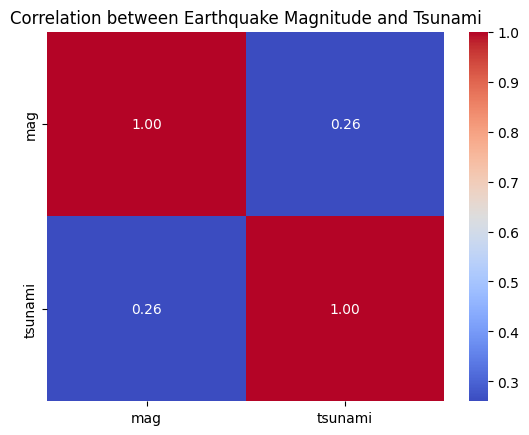

In [14]:
# Calculate correlation coefficients
correlation_hm = quakes[['mag', 'tsunami']].corr()

# Plot heatmap
sns.heatmap(correlation_hm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Earthquake Magnitude and Tsunami')

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

3. Fill in the area between the bounds in the plot from exercise #2.

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

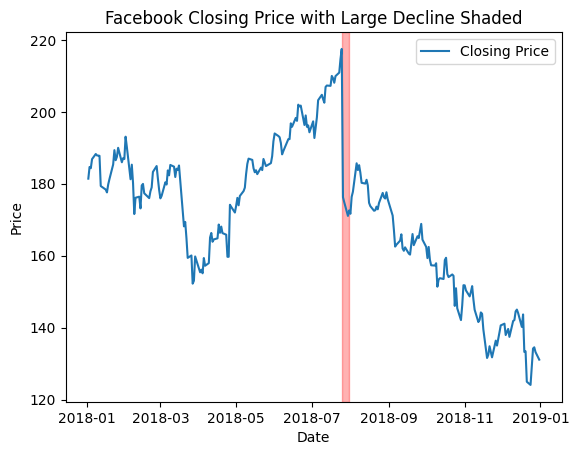

In [16]:
# Convert index to datetime if it's not already
fb.index = pd.to_datetime(fb.index)

# Plot closing price
plt.plot(fb.index, fb['close'], label='Closing Price')

# Shade the rectangle for the period of large decline
plt.axvspan('2018-07-25', '2018-07-31', color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Facebook Closing Price with Large Decline Shaded')

# Add legend
plt.legend()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:

Disappointing user growth announced after close on July 25, 2018

Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)

FTC launches investigation on March 20, 2018

Text(2018-03-20, 138.15, 'FTC launches investigation\non March 20, 2018')

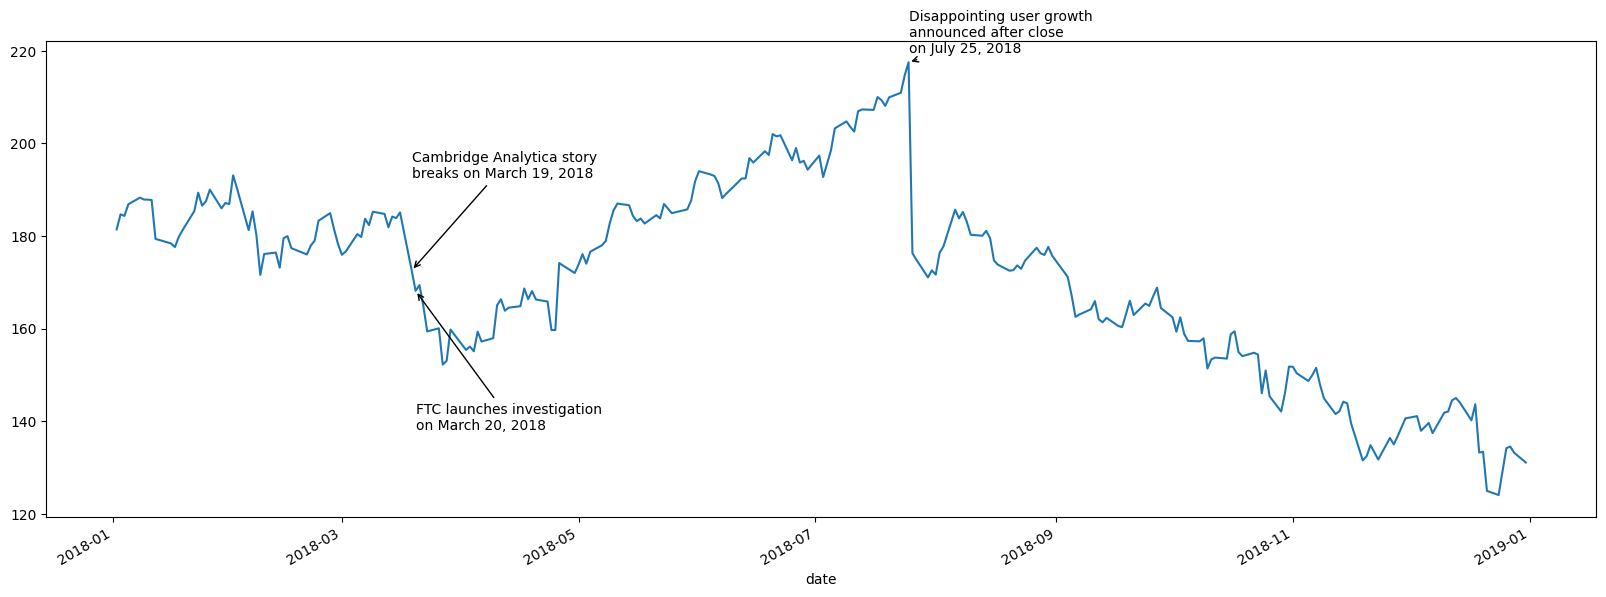

In [22]:
# Define specific dates and corresponding closing prices
specific_date = '2018-07-25'
specific_close = fb.loc[specific_date, 'close']

specific_date2 = '2018-03-19'
specific_close2 = fb.loc[specific_date2, 'close']

specific_date3 = '2018-03-20'
specific_close3 = fb.loc[specific_date3, 'close']

# Plot Facebook closing price
fb.close.plot(figsize=(20, 7))

# Annotate the events
plt.annotate('Disappointing user growth\nannounced after close\non July 25, 2018', xy=(specific_date, specific_close),
             xytext=(specific_date, specific_close + 2),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('Cambridge Analytica story\nbreaks on March 19, 2018', xy=(specific_date2, specific_close2),
             xytext=(specific_date2, specific_close2 + 20),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('FTC launches investigation\non March 20, 2018', xy=(specific_date3, specific_close3),
            xytext=(specific_date3, specific_close3 -30),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Facebook Closing Price with Annotated Events')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

<ipython-input-26-0801777ee907>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


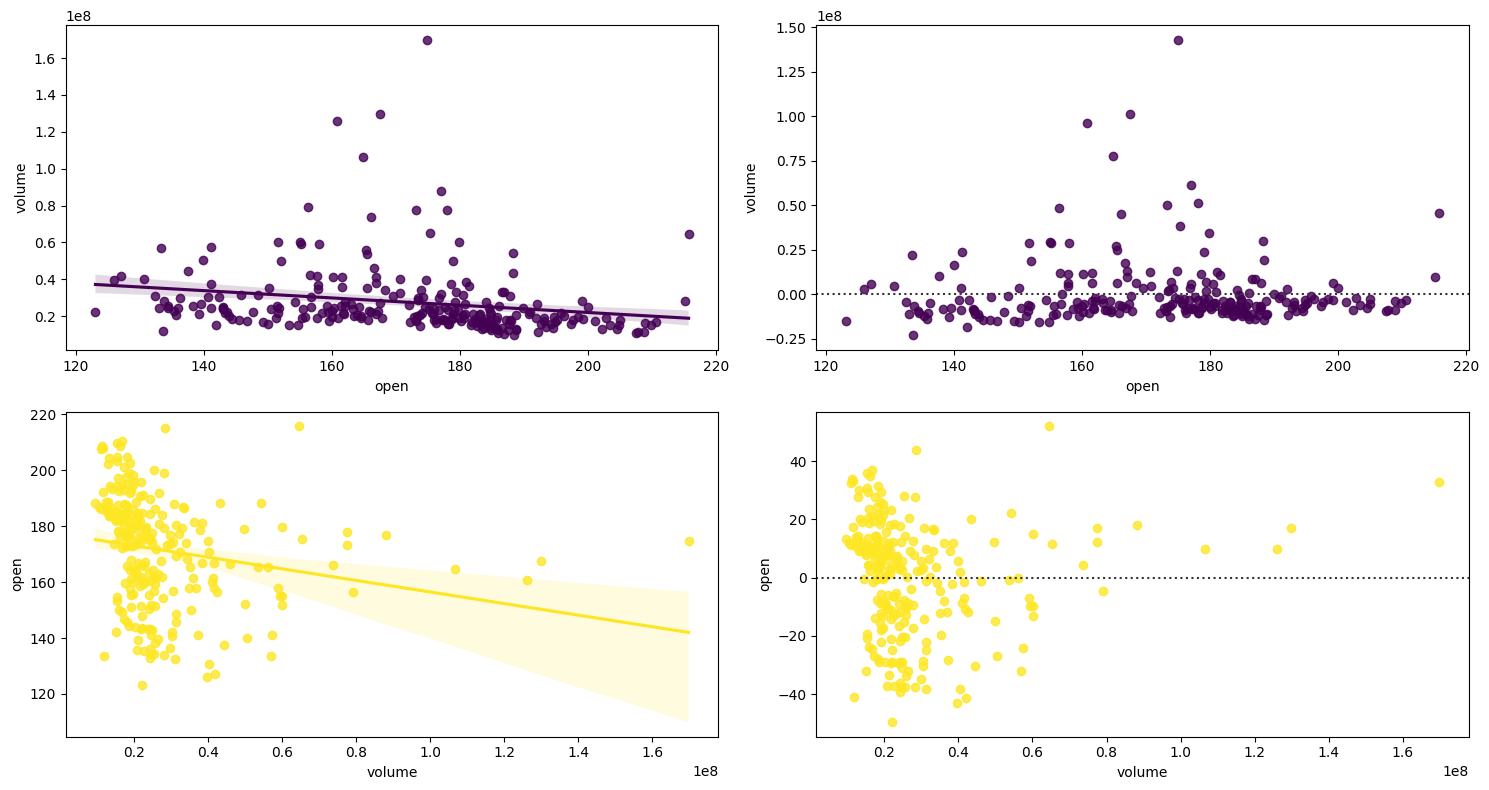

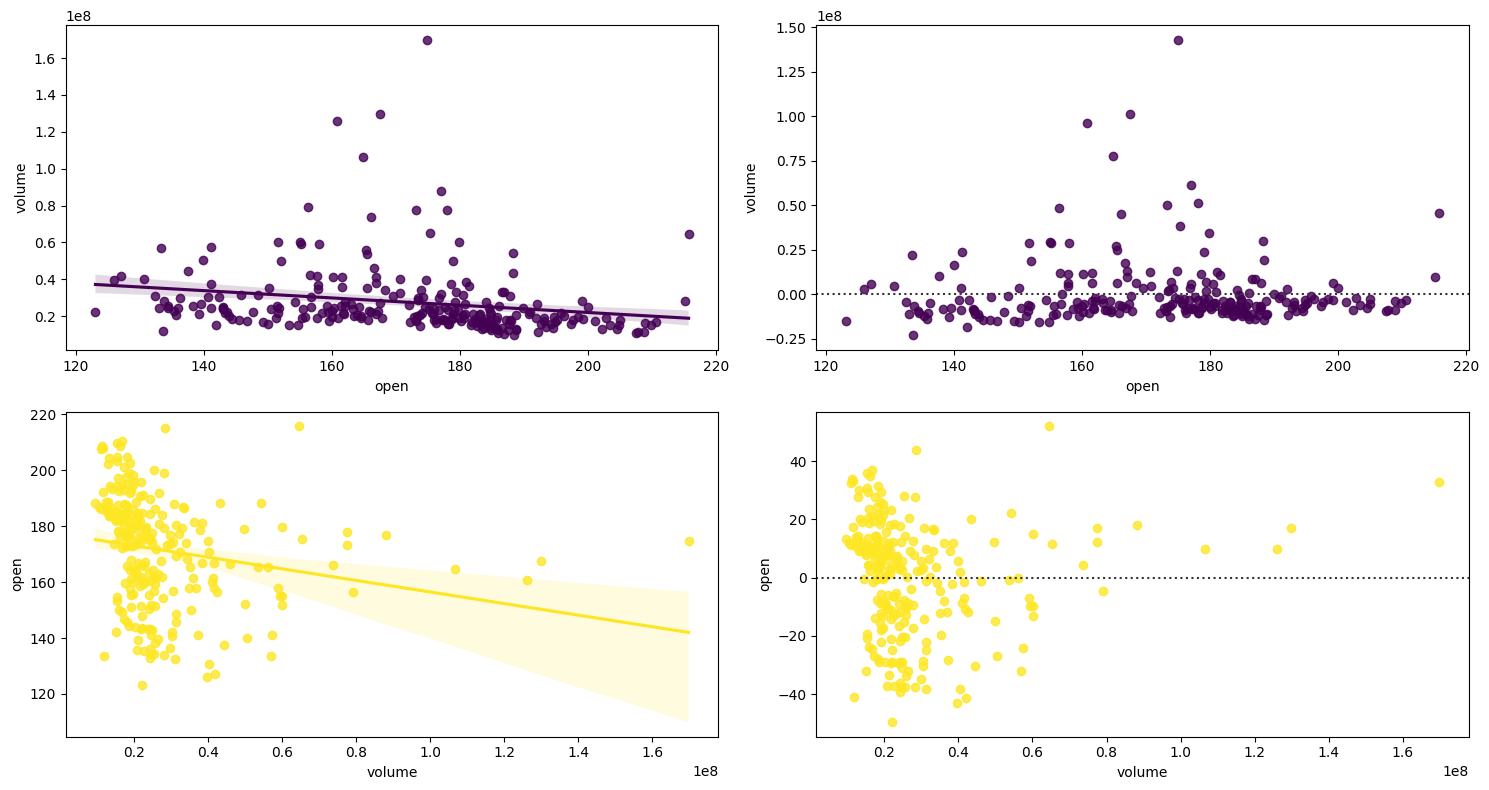

In [26]:
import itertools

def reg_resid_plots(data):
    # Get the number of features/columns in the dataset
    num_features = data.shape[1]
    # Calculate the number of permutations
    permutation_count = num_features * (num_features - 1)
    # Create subplots based on the number of permutations
    fig, axes = plt.subplots(permutation_count, 2, figsize=(15, 8))
    # Get a colormap for coloring plots
    cmap = plt.cm.get_cmap('viridis')
    # Generate a list of colors for each permutation
    colors = [cmap(i) for i in np.linspace(0, 1, permutation_count)]
    # Iterate over all pairs of features
    for (x, y), ax_row, color in zip(
            itertools.permutations(data.columns, 2),
            axes,
            colors):
        # Iterate over each subplot in the row
        for ax, plot_func in zip(ax_row, (sns.regplot, sns.residplot)):
            # Plot the regression or residual plot
            plot_func(x=x, y=y, data=data, ax=ax, color=color)
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Show the plot
    plt.show()
    # Return the figure object for potential further manipulation
    return fig

# Call the function with selected features from the dataset
reg_resid_plots(fb[['open', 'volume']])

# **Summary/Conclusion:**

Provide a summary of your learnings and the conclusion for this activity

First, the code imports necessary libraries such as Matplotlib and Pandas for data manipulation and visualization. It utilizes a sample DataFrame named 'fb' containing Facebook stock price data. The code plots the closing prices over time and annotates specific events on the plot. These events include the announcement of disappointing user growth on July 25, 2018, the breaking of the Cambridge Analytica story on March 19, 2018, and the launch of an FTC investigation on March 20, 2018. Each event is annotated with explanatory text and arrows indicating the direction of the event's impact on the stock price.